In [1]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

from numpy_CNN.NN_np import (
    FullyConnectedLayer,
    ReLULayer,
    SigmoidLayer,
    ReLULayer,
    AdamOptimizer,
    CrossEntropyLoss,
    LinearActivation,
    Sequential,
    Optimizer,
    SoftMaxLayer,
)

In [2]:
plt.gray()

<Figure size 432x288 with 0 Axes>

In [3]:
def one_hot(y: np.ndarray, n_classes: int):
    encoded = np.zeros((y.size, n_classes))
    encoded[np.arange(y.size), y] = 1
    return encoded

In [4]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)
y_train = one_hot(y_train, 10)
y_test = one_hot(y_test, 10)

In [5]:
y_train.shape, X_train.shape

((60000, 10), (60000, 784))

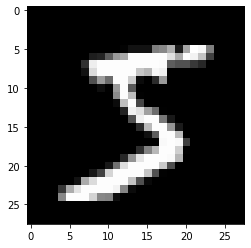

In [6]:
plt.imshow(X_train[0].reshape(28, 28))

In [7]:
def train(model, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray,
          optimizer: Optimizer, loss, epochs: int, batch_size: int):
    
    metric_names = ['loss', 'accuracy', 'f1_score']
    history = {phase_name: {metric_name: [] for metric_name in metric_names} for phase_name in ['train', 'test']}

    for i in range(epochs):
        for j in range(0, X_train.shape[0], batch_size):
            # print(f"epoch {i} batch {j}")
            X_batch = X_train[j:j+batch_size]
            y_batch = y_train[j:j+batch_size]
            y_pred = model.forward(X_batch)
            loss_val = loss.forward(y_pred, y_batch)
            loss_gradient = loss.backward()
            model.backward(loss_gradient)
            optimizer.step()

            y_pred_label = np.argmax(y_pred, axis=0)
            y_true_label = np.argmax(y_train, axis=0)

            history['train']['accuracy'].append(np.mean(y_pred_label == y_true_label))
            history['train']['loss'].append(loss_val)
            history['train']['f1_score'].append(f1_score(y_true_label, y_pred_label, average='macro'))

            wd = [
                np.mean([np.mean(layer.weights) for layer in model.trainable_layers]),
                np.max([np.max(layer.weights) for layer in model.trainable_layers]),
                np.mean([np.mean(layer.weights_gradient) for layer in model.trainable_layers]),
                np.max([np.max(layer.weights_gradient) for layer in model.trainable_layers])
            ]
            weights_data.append(wd)

    return history

In [8]:
# train(model, X, y, optimizer, loss, 10, X.shape[-1])

In [44]:
model = Sequential([28*28, 100, 10], [SigmoidLayer, SoftMaxLayer])
optimizer = AdamOptimizer(model.trainable_layers, learning_rate = 0.001)
loss = CrossEntropyLoss()

batch_size = 1024
epochs = 10
weights_data = []

history = train(model, X_train, y_train, X_test, y_test, optimizer, loss, epochs, batch_size)

c:\Users\SystemPoint\Documents\DNN_course_ITMO_2022\lab1\numpy_CNN\NN_np.py:94: RuntimeWarning: overflow encountered in exp
  self.output = 1 / (1 + np.exp(-input_))
c:\Users\SystemPoint\Documents\DNN_course_ITMO_2022\lab1\numpy_CNN\NN_np.py:94: RuntimeWarning: overflow encountered in exp
  self.output = 1 / (1 + np.exp(-input_))
c:\Users\SystemPoint\Documents\DNN_course_ITMO_2022\lab1\numpy_CNN\NN_np.py:94: RuntimeWarning: overflow encountered in exp
  self.output = 1 / (1 + np.exp(-input_))
c:\Users\SystemPoint\Documents\DNN_course_ITMO_2022\lab1\numpy_CNN\NN_np.py:94: RuntimeWarning: overflow encountered in exp
  self.output = 1 / (1 + np.exp(-input_))
c:\Users\SystemPoint\Documents\DNN_course_ITMO_2022\lab1\numpy_CNN\NN_np.py:94: RuntimeWarning: overflow encountered in exp
  self.output = 1 / (1 + np.exp(-input_))
c:\Users\SystemPoint\Documents\DNN_course_ITMO_2022\lab1\numpy_CNN\NN_np.py:94: RuntimeWarning: overflow encountered in exp
  self.output = 1 / (1 + np.exp(-input_))
c:\U

In [46]:
history['train']['loss']

[2361.6616344247263,
 2361.273222331255,
 2360.509108085886,
 2362.172112465847,
 2362.3420022141595,
 2361.4948360522303,
 2358.9704146759145,
 2362.5172972582104,
 2364.63904227095,
 2361.4726689238832,
 2361.742232528619,
 2361.766525930745,
 2359.3914685820523,
 2360.8645207966674,
 2361.508740050871,
 2360.0036340987235,
 2361.666493559047,
 2364.5118877989416,
 2362.301090324508,
 2361.8264344310064,
 2360.6703626553053,
 2360.8655052034173,
 2362.779775311985,
 2359.7246181035184,
 2362.8162679596476,
 2359.2235454705483,
 2359.0773209669496,
 2361.745651964142,
 2362.765285909007,
 2364.009446106784,
 2363.2274090642463,
 2357.223994313925,
 2362.526496704101,
 2365.0561916208544,
 2361.06983298154,
 2361.2693559031045,
 2358.968443960618,
 2361.2555948945105,
 2363.3658155923904,
 2360.794736798139,
 2360.263211322556,
 2361.1561192260774,
 2359.5190198929586,
 2361.0412732454,
 2360.320457901763,
 2361.6763346673483,
 2360.22473963653,
 2362.0366142571697,
 2359.0956381040637

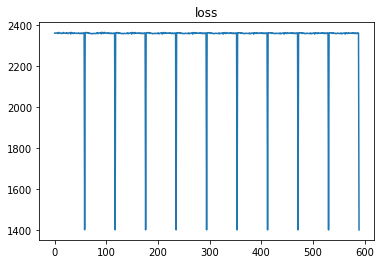

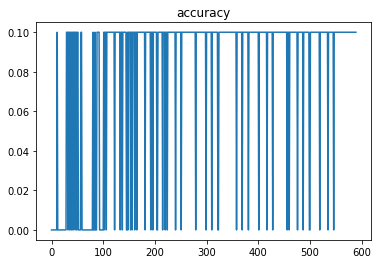

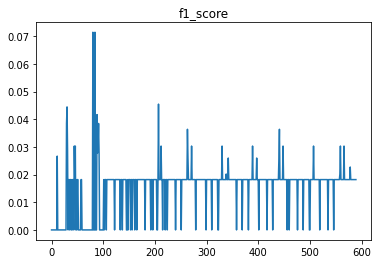

In [47]:
for key, value in history['train'].items():
    plt.plot(value)
    plt.title(key)
    plt.show()

In [32]:
a = model.forward(X_train[0])
a

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [ ]:
"""
def train(model, X: np.ndarray, y: np.ndarray, optimizer: Optimizer, loss, epochs: int, batch_size: int = 32, verbose: bool = True):
    for epoch in range(epochs):
        for X_batch, y_batch in get_batches(X, y, batch_size):
            y_pred = model.forward(X_batch)
            loss_gradient = loss.gradient(y_batch, y_pred)
            model.backward(loss_gradient)
            optimizer.step()
        if verbose:
            print(f"Epoch {epoch + 1}/{epochs} loss: {loss(y_batch, y_pred)}")
"""

'\ndef train(model, X: np.ndarray, y: np.ndarray, optimizer: Optimizer, loss, epochs: int, batch_size: int = 32, verbose: bool = True):\n    for epoch in range(epochs):\n        for X_batch, y_batch in get_batches(X, y, batch_size):\n            y_pred = model.forward(X_batch)\n            loss_gradient = loss.gradient(y_batch, y_pred)\n            model.backward(loss_gradient)\n            optimizer.step()\n        if verbose:\n            print(f"Epoch {epoch + 1}/{epochs} loss: {loss(y_batch, y_pred)}")\n'

In [15]:
import torch

c:\Users\SystemPoint\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:


X_train_torch = torch.from_numpy(X_train).float()
y_train_torch = torch.from_numpy(y_train)

X_test_torch = torch.from_numpy(X_test).float()
y_test_torch = torch.from_numpy(y_test)

def train_torch(model, X_train: torch.Tensor, y_train: torch.Tensor, X_test: torch.Tensor, y_test: torch.Tensor,
          optimizer, loss, epochs: int, batch_size: int):
    
    metric_names = ['loss', 'accuracy', 'f1_score']
    history = {phase_name: {metric_name: [] for metric_name in metric_names} for phase_name in ['train', 'test']}

    for i in range(epochs):
        for j in range(0, X_train.shape[0], batch_size):
            # print(f"epoch {i} batch {j}")
            X_batch = X_train[j:j+batch_size]
            y_batch = y_train[j:j+batch_size]
            y_pred = model(X_batch)
            loss_val = loss(y_pred, y_batch)
            model.zero_grad()
            loss_val.backward()
            optimizer.step()

            y_pred_label = np.argmax(y_pred.detach().numpy(), axis=0)
            y_true_label = np.argmax(y_train.detach().numpy(), axis=0)

            history['train']['accuracy'].append(np.mean(y_pred_label == y_true_label).item())
            history['train']['loss'].append(loss_val.item())
            history['train']['f1_score'].append(f1_score(y_true_label, y_pred_label, average='macro').item())

    return history

In [49]:
model_torch = torch.nn.Sequential(
    torch.nn.Linear(28*28, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 10),
    torch.nn.Softmax()
)

weights_data_torch = []

optimizer_torch = torch.optim.Adam(model_torch.parameters(), lr=0.001)

loss_torch = torch.nn.CrossEntropyLoss()

history_torch = train_torch(model_torch, X_train_torch, y_train_torch, X_test_torch, y_test_torch, optimizer_torch, loss_torch, 10, 1024)

c:\Users\SystemPoint\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
c:\Users\SystemPoint\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
c:\Users\SystemPoint\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
c:\Users\SystemPoint\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as a

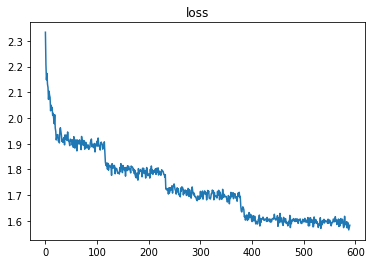

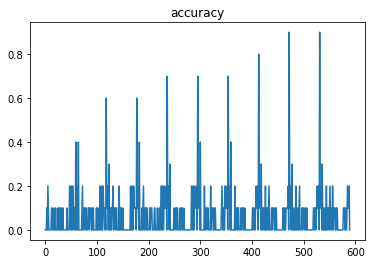

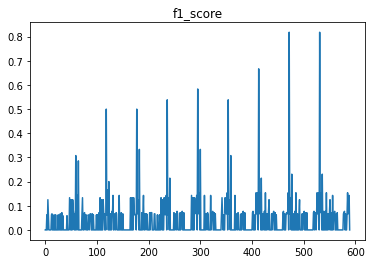

In [50]:
for key, value in history_torch['train'].items():
    plt.plot(value)
    plt.title(key)
    plt.show()

In [40]:
history_torch['train']['loss'][0]

2.321152621298097